# Which studios are the biggest competition?

Competition determined by highest world-wide gross revenue

## Data Cleaning bom_movie_gross_df

**Data cleaning overview:**

* Check for duplicates.
* Remove 28 movies with domestic_gross NaNs
* Remove 1350 movies with foreign_gross NaNs
* Convert foreign_gross from str to float
* Replace 2 studio values from NaNs to Unknown
* Create a world_wide_gross column that adds together domestic_gross and foreign_gross
* Convert monetary values and column names to millions

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
bom_movie_gross_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
print(len(bom_movie_gross_df))
bom_movie_gross_df.head()

3387


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# check for duplicates
bom_dups = bom_movie_gross_df[bom_movie_gross_df.duplicated()]
len(bom_dups)

0

In [5]:
# preview dropping movies with no domestic gross figure, should show 3359 rows

bom_movie_gross_df.drop(bom_movie_gross_df[bom_movie_gross_df.domestic_gross.isna()].index)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
# perform the movie drop by adding inplace=True
bom_movie_gross_df.drop(bom_movie_gross_df[bom_movie_gross_df.domestic_gross.isna()].index,inplace=True)
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
title             3359 non-null object
studio            3356 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2009 non-null object
year              3359 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 157.5+ KB


In [7]:
# preview dropping movies with no foreign gross figure, should show 2009 rows
bom_movie_gross_df.drop(bom_movie_gross_df[bom_movie_gross_df.foreign_gross.isna()].index)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [8]:
# perform the movie drop by adding inplace=True
bom_movie_gross_df.drop(bom_movie_gross_df[bom_movie_gross_df.foreign_gross.isna()].index,inplace=True)
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
title             2009 non-null object
studio            2007 non-null object
domestic_gross    2009 non-null float64
foreign_gross     2009 non-null object
year              2009 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


In [9]:
# studio has two null values, set to Unknown
bom_movie_gross_df.studio.fillna('Unknown', inplace=True)
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
title             2009 non-null object
studio            2009 non-null object
domestic_gross    2009 non-null float64
foreign_gross     2009 non-null object
year              2009 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


In [10]:
# convert to foreign gross to float, initial error because of a comma in one of the values so must remove commas
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
title             2009 non-null object
studio            2009 non-null object
domestic_gross    2009 non-null float64
foreign_gross     2009 non-null float64
year              2009 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 94.2+ KB


In [11]:
# create feature of world_wide_gross
bom_movie_gross_df['world_wide_gross'] = bom_movie_gross_df['domestic_gross'] + bom_movie_gross_df['foreign_gross']
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,world_wide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [12]:
# Divide all monetary values by 1000000 for display purposes
bom_movie_gross_df['world_wide_gross'] = bom_movie_gross_df['world_wide_gross']/1000000
bom_movie_gross_df['domestic_gross'] = bom_movie_gross_df['domestic_gross']/1000000
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross']/1000000
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,world_wide_gross
0,Toy Story 3,BV,415.0,652.0,2010,1067.0
1,Alice in Wonderland (2010),BV,334.2,691.3,2010,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296.0,664.3,2010,960.3
3,Inception,WB,292.6,535.7,2010,828.3
4,Shrek Forever After,P/DW,238.7,513.9,2010,752.6


In [13]:
# Change column names to reflect (millions)
bom_movie_gross_df.rename(columns={'domestic_gross': 'domestic_gross(mils)', 
                                           'foreign_gross': 'foreign_gross(mils)', 
                                           'world_wide_gross': 'world_wide_gross(mils)'}, errors="raise", inplace=True)
bom_movie_gross_df.columns

Index(['title', 'studio', 'domestic_gross(mils)', 'foreign_gross(mils)',
       'year', 'world_wide_gross(mils)'],
      dtype='object')

**Data cleaning details:**

* Check for duplicates.
* Remove 28 movies with domestic_gross NaNs
* Remove 1350 movies with foreign_gross NaNs
* Convert foreign_gross from str to float
* Replace 2 studio values from NaNs to Unknown
* Create a world_wide_gross column that adds together domestic_gross and foreign_gross
* Convert monetary values and column names to millions

In [14]:
# I think the data is clean now and ready for some analysis.  Let's save it to a .csv file and then read it back in.

bom_movie_gross_df.to_csv('../cleanedData/clean_bom_movie_gross_df.csv')

clean_bom_movie_gross_df = pd.read_csv('../cleanedData/clean_bom_movie_gross_df.csv',index_col=[0])
print(len(clean_bom_movie_gross_df))
clean_bom_movie_gross_df.head()

2009


,title,studio,domestic_gross(mils),foreign_gross(mils),year,world_wide_gross(mils)
0,Toy Story 3,BV,415.0,652.0,2010,1067.0
1,Alice in Wonderland (2010),BV,334.2,691.3,2010,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296.0,664.3,2010,960.3
3,Inception,WB,292.6,535.7,2010,828.3
4,Shrek Forever After,P/DW,238.7,513.9,2010,752.6


## Exploratory Data Analysis and Visualization

### **EDA overview:**

We will answer the question of which studios are Microsoft's biggest competition by establishing a rank order of world-wide gross revenue (in millions) for all studios and then examining the top 20 studios.  As a comparison, we will then also calculate the top 20 grossing movies and see which studio has produced them.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")

In [16]:
clean_bom_movie_gross_df.head()

,title,studio,domestic_gross(mils),foreign_gross(mils),year,world_wide_gross(mils)
0,Toy Story 3,BV,415.0,652.0,2010,1067.0
1,Alice in Wonderland (2010),BV,334.2,691.3,2010,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296.0,664.3,2010,960.3
3,Inception,WB,292.6,535.7,2010,828.3
4,Shrek Forever After,P/DW,238.7,513.9,2010,752.6


In [17]:
# Group movies by studio, find top 20 world-wide
studio_grouped_df = clean_bom_movie_gross_df.groupby(['studio']).sum()
top_20_studios = studio_grouped_df.nlargest(20, 'world_wide_gross(mils)')
top_20_studios

,domestic_gross(mils),foreign_gross(mils),year,world_wide_gross(mils)
studio,,,,
BV,18396.529199,25793.854700,209428,44190.383899
Fox,10924.499997,20055.866599,269857,30980.366596
WB,12123.600000,18667.902998,261801,30791.502998
Uni.,12892.038000,16854.771191,290029,29746.809191
Sony,8459.479098,13945.235998,211497,22404.715096
Par.,7580.812699,11863.384998,189311,19444.197697
WB (NL),3975.099999,6339.000000,88628,10314.099999
LGF,3991.851400,4475.619300,175204,8467.470700
LG/S,1965.199998,3353.724000,74534,5318.923998


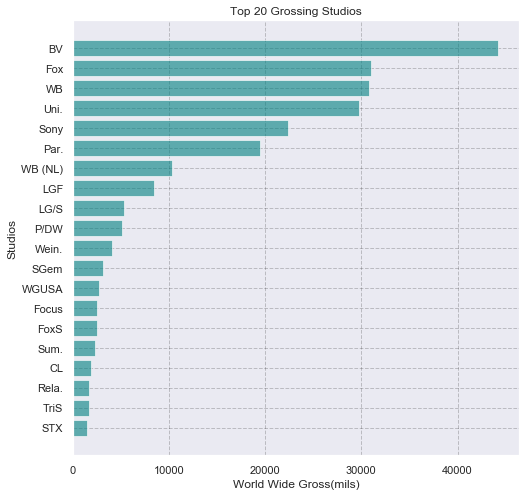

In [18]:
fig = plt.figure(figsize = (8, 8))
plt.barh(top_20_studios.index, top_20_studios['world_wide_gross(mils)'], color = 'teal', alpha = 0.60)
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Top 20 Grossing Studios')
plt.xlabel('World Wide Gross(mils)')
plt.gca().invert_yaxis()
plt.ylabel('Studios');

In [19]:
#  These are top grossing studios.  What if I calculated top grossing movies, then looked up who made them?

In [20]:
top100movies = clean_bom_movie_gross_df.nlargest(100, ['world_wide_gross(mils)'])
top100movies.head()

,title,studio,domestic_gross(mils),foreign_gross(mils),year,world_wide_gross(mils)
727,Marvel's The Avengers,BV,623.4,895.5,2012,1518.9
1875,Avengers: Age of Ultron,BV,459.0,946.4,2015,1405.4
3080,Black Panther,BV,700.1,646.9,2018,1347.0
328,Harry Potter and the Deathly Hallows Part 2,WB,381.0,960.5,2011,1341.5
2758,Star Wars: The Last Jedi,BV,620.2,712.4,2017,1332.6


In [21]:
movies_grouped = top100movies.groupby(['studio']).sum()
top_movie_studios=movies_grouped.nlargest(20,['world_wide_gross(mils)'])
top_movie_studios

,domestic_gross(mils),foreign_gross(mils),year,world_wide_gross(mils)
studio,,,,
BV,12937.000000,18652.002501,66492,31589.002501
WB,4400.800000,8090.900000,30216,12491.700000
Uni.,3126.000000,4925.301019,18134,8051.301019
Fox,2445.600000,5422.500000,22163,7868.100000
Sony,2100.600000,4676.900000,16117,6777.500000
Par.,1500.599999,3678.800000,14099,5179.399999
WB (NL),1143.999999,2491.900000,8056,3635.899999
P/DW,972.700000,2316.200000,8044,3288.900000
LGF,1451.500000,1516.600000,8054,2968.100000


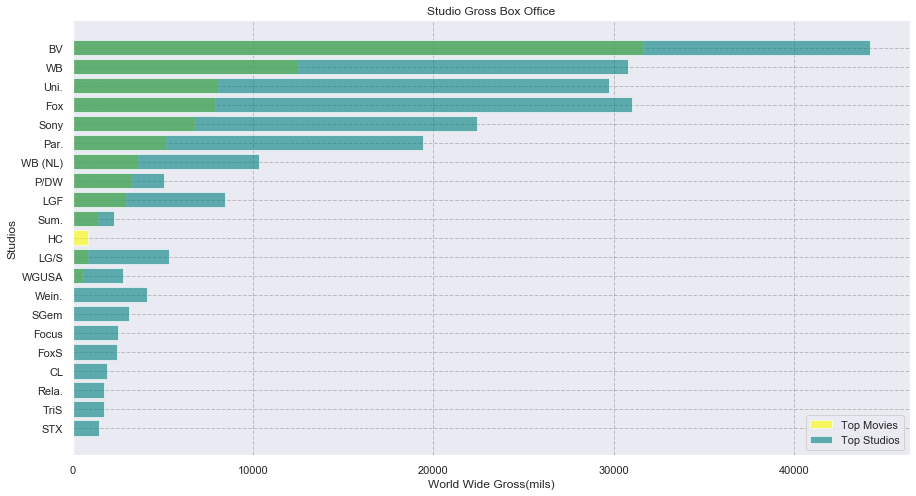

In [23]:
fig = plt.figure(figsize = (15, 8))
plt.barh(top_movie_studios.index, top_movie_studios['world_wide_gross(mils)'], color = 'yellow', alpha = 0.60, label='Top Movies')
plt.barh(top_20_studios.index, top_20_studios['world_wide_gross(mils)'], color = 'teal', alpha = 0.60, label='Top Studios')
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Studio Gross Box Office')
plt.gca().invert_yaxis()
plt.ylabel('Studios')
plt.xlabel('World Wide Gross(mils)')
plt.legend()
plt.savefig('../images/studios.png')
plt.show();

## Conclusion:

Buena Vista, Fox, and Warner Brothers top our list of highest grossing studios according to this dataset. And Buena Vista received the majority of its world-wide box office revenue from the top 100 blockbuster hits.  This would certainly indicate that Buena Vista is the competitor to watch.  Interestingly, however, the name Buena Vista was discontinued as a trade name in 2009 by its parent owner Walt Disney Studios, bringing into question the timeliness of our dataset.  Further research into each studio is recommended as well as an analysis of the studios' performance over time.